# Imports

In [4]:
import pandas as pd
import numpy as np

In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

In [7]:
#!pip install openpyxl

# London merged

## Data Frame preprocessing

In [8]:
london_merged = pd.read_csv("london_merged.csv")
london_merged['timestamp'] = pd.to_datetime(london_merged['timestamp'])
london_merged["hour"] = london_merged['timestamp'].dt.hour
london_merged["day"] = london_merged['timestamp'].dt.day_name()
london_merged["month"] = london_merged['timestamp'].dt.month_name()
london_merged["month_int"] = london_merged['timestamp'].dt.month

In [9]:
london_merged["month"].value_counts()

May          1488
January      1487
August       1484
December     1484
July         1481
October      1479
March        1468
April        1438
November     1430
June         1422
September    1394
February     1359
Name: month, dtype: int64

## Graphs

### Bike trips by starting hour

Text(0.5, 0, 'Starting hour')

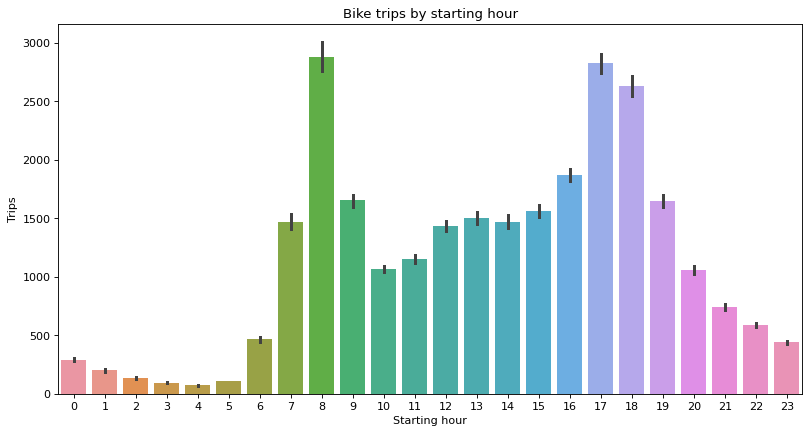

In [10]:
plt.figure(figsize=(12,6), dpi=80)
bike_rides = sns.barplot(data=london_merged, x = "hour", y = "cnt")
plt.title("Bike trips by starting hour")
bike_rides.set_ylabel('Trips')
bike_rides.set_xlabel('Starting hour')

### Bikes usage on weekends and weekdays 

In [11]:
london_weekend= london_merged[london_merged["is_weekend"]==1.0]
london_weekdays= london_merged[london_merged["is_weekend"]==0.0]


Text(0.5, 18.0, 'Starting hour')

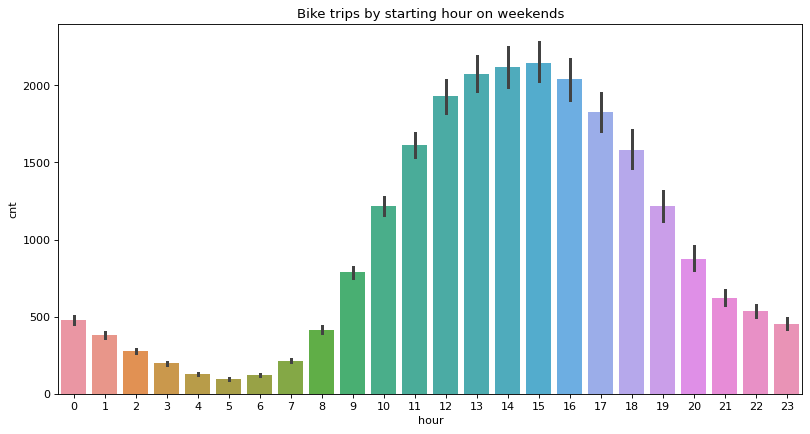

In [12]:
plt.figure(figsize=(12,6), dpi=80)
weekend_rides = sns.barplot(data=london_weekend, x = "hour", y = "cnt")
plt.title("Bike trips by starting hour on weekends")
bike_rides.set_ylabel('Trips')
bike_rides.set_xlabel('Starting hour')

Text(0.5, 18.0, 'Starting hour')

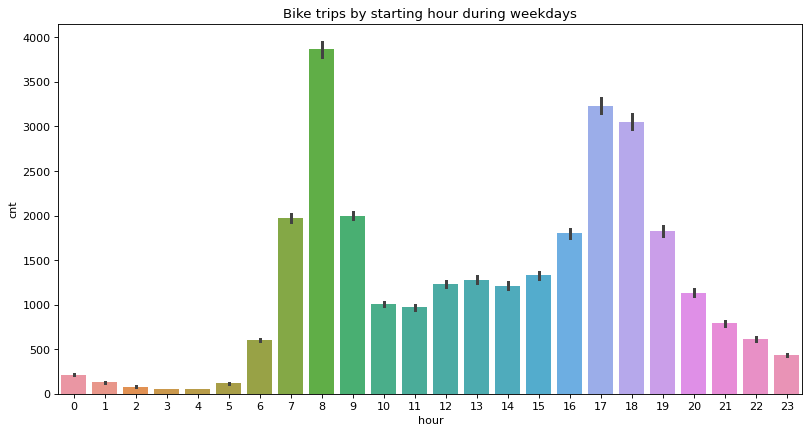

In [13]:
plt.figure(figsize=(12,6), dpi=80)
weekend_rides = sns.barplot(data=london_weekdays, x = "hour", y = "cnt")
plt.title("Bike trips by starting hour during weekdays")
bike_rides.set_ylabel('Trips')
bike_rides.set_xlabel('Starting hour')

### Bike trips by day of week

Text(0.5, 18.0, 'Day of the week')

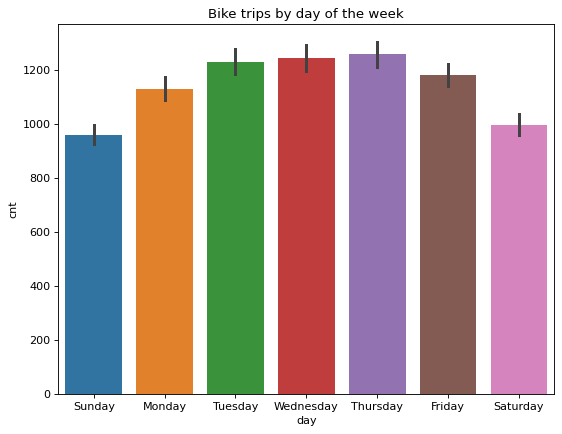

In [14]:
plt.figure(figsize=(8, 6), dpi=80)
sns.barplot(data=london_merged, x = "day", y = "cnt") # Podría considerar que no sean feriados. # o por qué el lunes menos
plt.title("Bike trips by day of the week")
bike_rides.set_ylabel('Trips')
bike_rides.set_xlabel('Day of the week')

### Bike trips by month

In [15]:
month_avg = london_merged.groupby("month_int")['cnt'].mean().to_frame().reset_index()

In [16]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

Text(0.5, 0, 'Month')

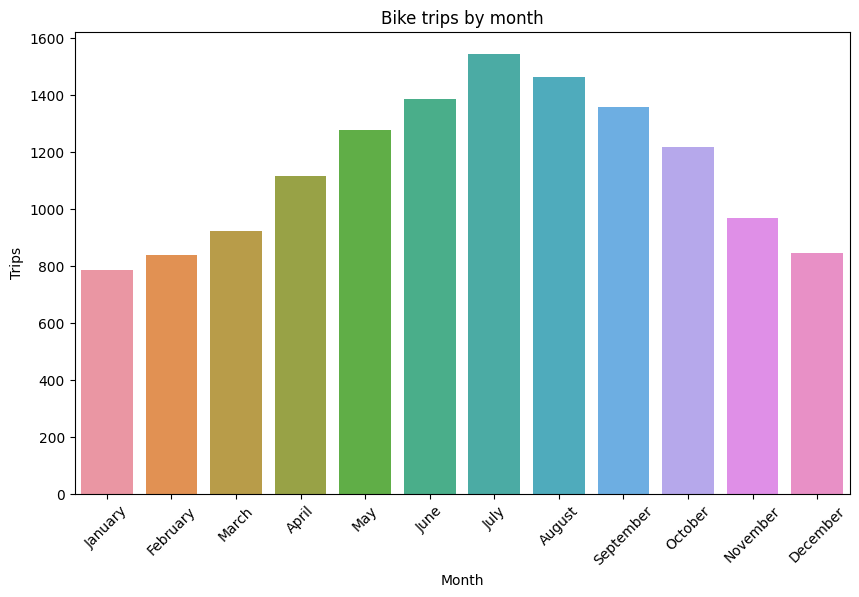

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
bike_rides = sns.barplot(data=month_avg, x = "month_int", y = "cnt")
plt.xticks(rotation=45)
ax.set_xticklabels(month_order)
plt.title("Bike trips by month")
bike_rides.set_ylabel('Trips')
bike_rides.set_xlabel('Month')

### Bike trips by temperature

In [18]:
london_merged.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day,month,month_int
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,Sunday,January,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,Sunday,January,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,Sunday,January,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,Sunday,January,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,Sunday,January,1


In [19]:
london_merged['temperature'] = london_merged['t1'].apply(int)

In [20]:
london_temperature_df = london_merged.loc[london_merged.hour==8].groupby("temperature")['cnt'].sum().to_frame().reset_index()

In [21]:
london_df_temperature_count = london_merged.loc[london_merged.hour==8]['temperature'].value_counts().sort_index()

In [22]:
london_temperature_mean = london_merged.loc[london_merged.hour==8].groupby("temperature")['cnt'].sum() / london_df_temperature_count
london_temperature_mean = london_temperature_mean.to_frame().reset_index()

In [23]:
london_temperature_mean.columns = ["temperature", "average"]

<AxesSubplot: xlabel='temperature', ylabel='average'>

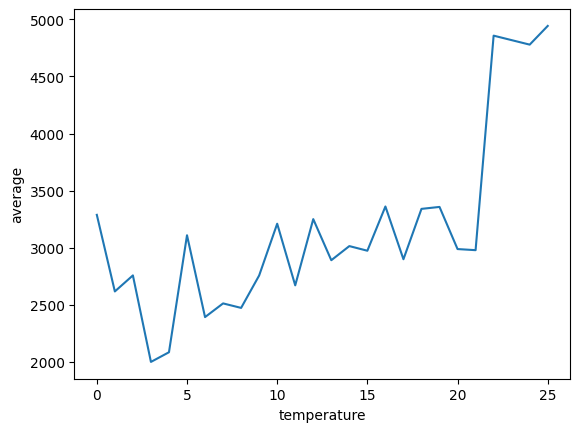

In [24]:
sns.lineplot(data=london_temperature_mean, x = "temperature", y = "average")

Text(0.5, 0, 'Temperature (Celsius)')

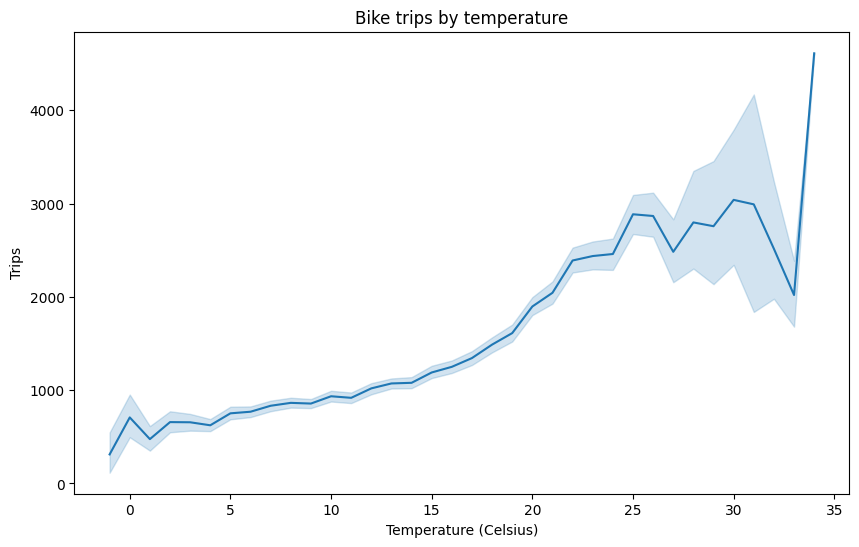

In [25]:
fig, ax = plt.subplots(figsize=(10,6))

bike_rides = sns.lineplot(data=london_merged, x = "temperature", y = "cnt")
#plt.xticks(rotation=45)
plt.title("Bike trips by temperature")
bike_rides.set_ylabel('Trips')
bike_rides.set_xlabel('Temperature (Celsius)')

# Daily cicle hires Dataframe

## Preprocessing

In [26]:
journey_biking = pd.read_excel("tfl-daily-cycle-hires.xlsx", sheet_name = "Data")

journey_biking = journey_biking[["Day", "Number of Bicycle Hires"]].copy()

journey_biking = journey_biking.dropna()

journey_biking["Day"] = pd.to_datetime(journey_biking["Day"])

journey_biking["Year"] = journey_biking["Day"].dt.year

journey_biking = journey_biking[journey_biking.Year != 2022]

In [27]:
journey_biking.head(5)


,Day,Number of Bicycle Hires,Year
0,2010-07-30,6897,2010
1,2010-07-31,5564,2010
2,2010-08-01,4303,2010
3,2010-08-02,6642,2010
4,2010-08-03,7966,2010


## Graphs

### Bike trips per year

Text(0.5, 0, 'Year')

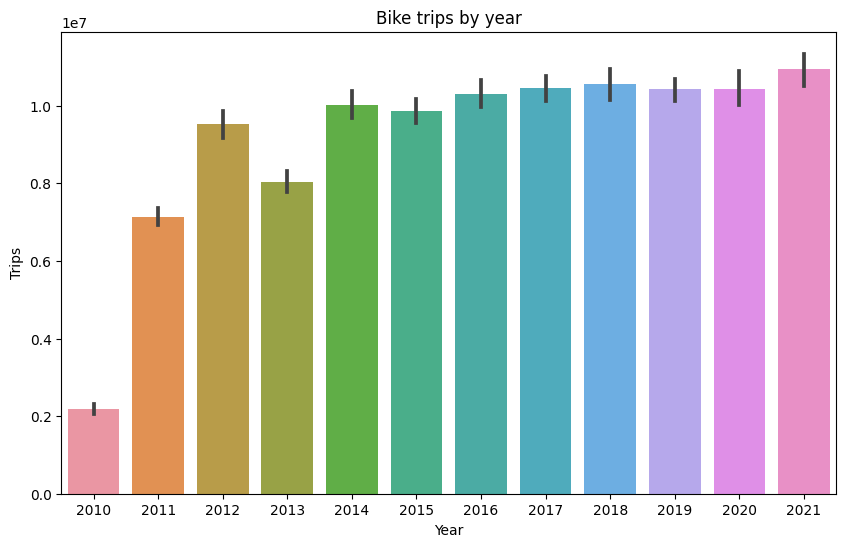

In [28]:
fig, ax = plt.subplots(figsize=(10,6))

bike_rides = sns.barplot(data=journey_biking, x = "Year", y = "Number of Bicycle Hires", estimator=sum)

plt.title("Bike trips by year")
bike_rides.set_ylabel('Trips')
bike_rides.set_xlabel('Year')

# Airquality

## Preprocessing

In [29]:
air_quality_monthly = pd.read_excel("air-quality-london.xlsx", sheet_name = "Monthly averages", skiprows = 1)
air_quality_monthly['Month'] = pd.to_datetime(air_quality_monthly['Month'])
air_quality_monthly['Year'] = air_quality_monthly['Month'].dt.year

In [30]:
air_quality_by_year_nitrogen = air_quality_monthly.query('Year < 2019').groupby("Year")["Nitrogen Dioxide (ug/m3)"].sum()
air_quality_by_year_PM10 = air_quality_monthly.query('Year < 2019').groupby("Year")["PM10 Particulate (ug/m3)"].sum()
air_quality_by_year_PM25 = air_quality_monthly.query('Year < 2019').groupby("Year")["PM2.5 Particulate (ug/m3)"].sum()

## Graphs

### Emissions per year

Text(0.5, 1.0, 'Nitrogen Dioxide per year')

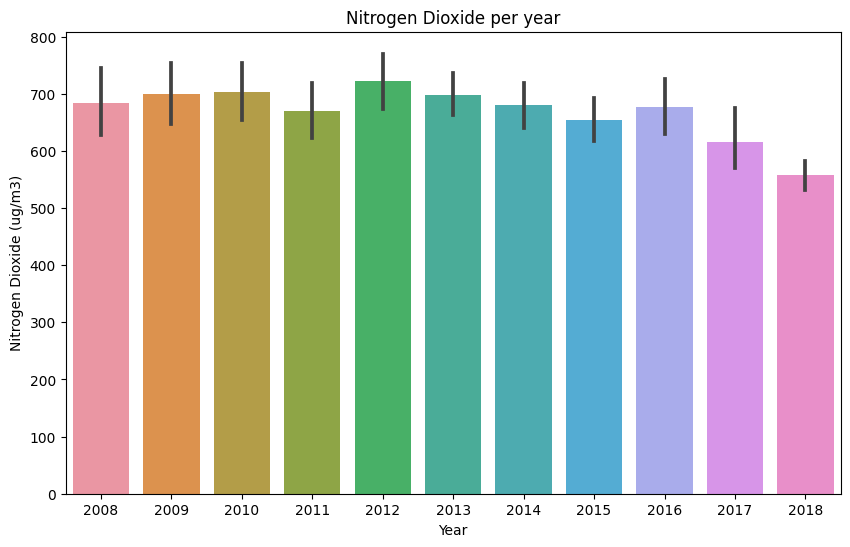

In [31]:
fig, ax = plt.subplots(figsize=(10,6))

nd_year = sns.barplot(data=air_quality_monthly.query('Year < 2019'), x = "Year", y = "Nitrogen Dioxide (ug/m3)", estimator=sum)

plt.title("Nitrogen Dioxide per year")

Text(0.5, 1.0, 'Nitrogen Dioxide per year')

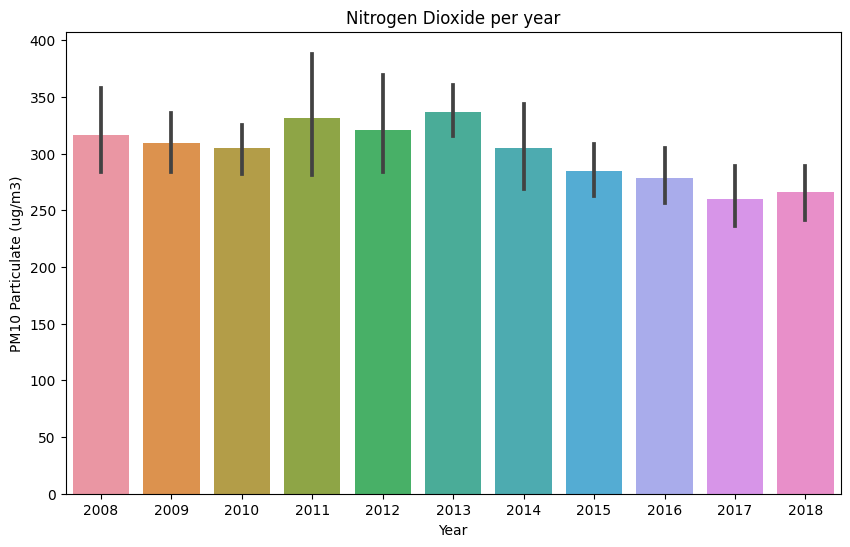

In [32]:
fig, ax = plt.subplots(figsize=(10,6))

nd_year = sns.barplot(data=air_quality_monthly.query('Year < 2019'), x = "Year", y = "PM10 Particulate (ug/m3)", estimator=sum)

plt.title("Nitrogen Dioxide per year")

Text(0.5, 1.0, 'PM2.5 Particulate')

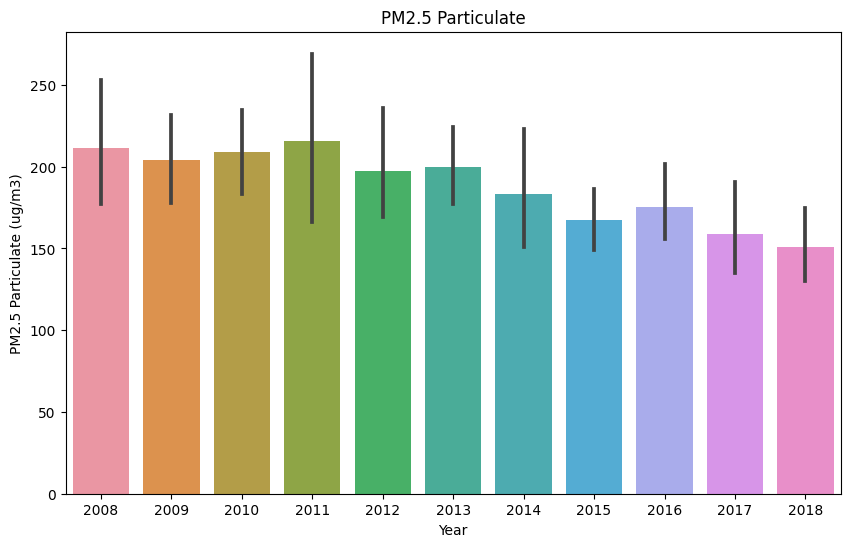

In [33]:
fig, ax = plt.subplots(figsize=(10,6))

nd_year = sns.barplot(data=air_quality_monthly.query('Year < 2019'), x = "Year", y = "PM2.5 Particulate (ug/m3)", estimator=sum)

plt.title("PM2.5 Particulate")

In [34]:
air_quality_monthly.head()

,Month,Nitric Oxide (ug/m3),Nitrogen Dioxide (ug/m3),Oxides of Nitrogen (ug/m3),Ozone (ug/m3),PM10 Particulate (ug/m3),PM2.5 Particulate (ug/m3),Sulphur Dioxide (ug/m3),Nitric Oxide (ug/m3).1,Nitrogen Dioxide (ug/m3).1,Oxides of Nitrogen (ug/m3).1,Ozone (ug/m3).1,PM10 Particulate (ug/m3).1,PM2.5 Particulate (ug/m3).1,Sulphur Dioxide (ug/m3).1,Year
0,2008-01-01,NaN,55.502688,NaN,29.512097,24.969086,14.678763,4.217742,NaN,42.338710,NaN,36.942204,18.817204,.,3.572581,2008
1,2008-02-01,NaN,75.922414,NaN,20.317529,39.477011,28.772989,7.553161,NaN,60.237069,NaN,26.425287,31.896552,.,6.734195,2008
2,2008-03-01,NaN,55.610215,NaN,40.103495,21.569892,12.300135,3.868280,NaN,39.801075,NaN,50.227151,15.477151,.,2.286290,2008
3,2008-04-01,NaN,61.756944,NaN,37.884722,28.740278,20.461111,4.475000,NaN,44.009722,NaN,50.133333,21.729167,.,3.236111,2008
4,2008-05-01,NaN,62.903226,NaN,46.266129,34.611559,27.508065,4.634409,NaN,44.141129,NaN,60.512097,29.545699,16.576826,4.250000,2008


# Public transport

## Preprocessing

In [35]:
import calendar

In [36]:
journeys = pd.read_excel("tfl-journeys-type April 2010 - May 2022.xlsx", sheet_name = "Journeys")
journeys.head(5)

,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),Emirates Airline Journeys (m),TfL Rail Journeys (m)
0,01_10/11,1,31,2010-04-01,2010-05-01,189.114661,90.545391,6.291000,2.287785,NaN,NaN,NaN
1,02_10/11,2,28,2010-05-02,2010-05-29,181.604792,84.517504,5.813000,2.154791,NaN,NaN,NaN
2,03_10/11,3,28,2010-05-30,2010-06-26,175.883173,84.286014,5.752000,2.129122,NaN,NaN,NaN
3,04_10/11,4,28,2010-06-27,2010-07-24,183.428052,86.479612,6.064480,2.141941,NaN,NaN,NaN
4,05_10/11,5,28,2010-07-25,2010-08-21,160.422767,82.895287,5.767624,2.008482,NaN,NaN,NaN


In [37]:
journeys["Period beginning"] = pd.to_datetime(journeys["Period beginning"])

journeys["Period ending"] = pd.to_datetime(journeys["Period ending"])

interesting_columns = ['Bus journeys (m)','Underground journeys (m)']

In [38]:
dates = []
bus_trips = []
underground_trips = []
for index, row in journeys.iterrows():
    starting_date = row["Period beginning"]
    ending_date = row["Period ending"]
    total_days = (ending_date - starting_date).days
    if not sum(row[interesting_columns].isna()):
        while starting_date < ending_date:
            dates.append(starting_date)
            bus_trips.append(row["Bus journeys (m)"])
            underground_trips.append(row["Underground journeys (m)"])
            starting_date = starting_date + pd.DateOffset(1)

In [39]:
df = pd.DataFrame()
df['bus_trips'] = bus_trips
df['underground_trips'] = underground_trips
df.index = dates

df['month'] = df.index.month_name()
df['month_int'] = df.index.month
df['day'] = df.index.day_name()
df['year'] = df.index.year

In [40]:
month_dic = {x:calendar.month_name[x] for x in range(1,13)}


## Graphs

### Bus trips per month

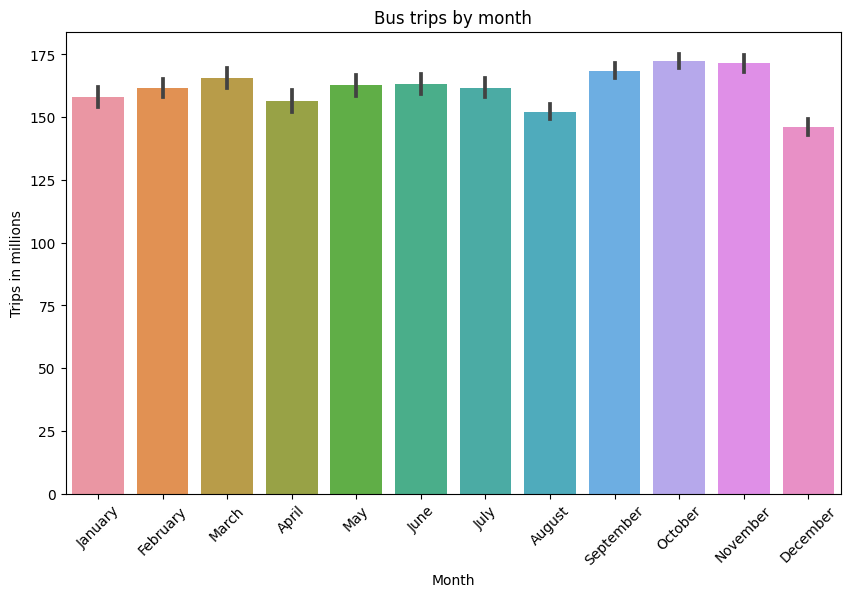

In [41]:
fig, ax = plt.subplots(figsize=(10,6))

bus_data = sns.barplot(data=df, x = "month_int", y = "bus_trips")

plt.title("Bus trips by month")
bus_data.set_ylabel('Trips in millions')
bus_data.set_xlabel('Month')


plt.xticks(rotation=45)
ax.set_xticklabels(month_dic.values());

### Underground trips per month

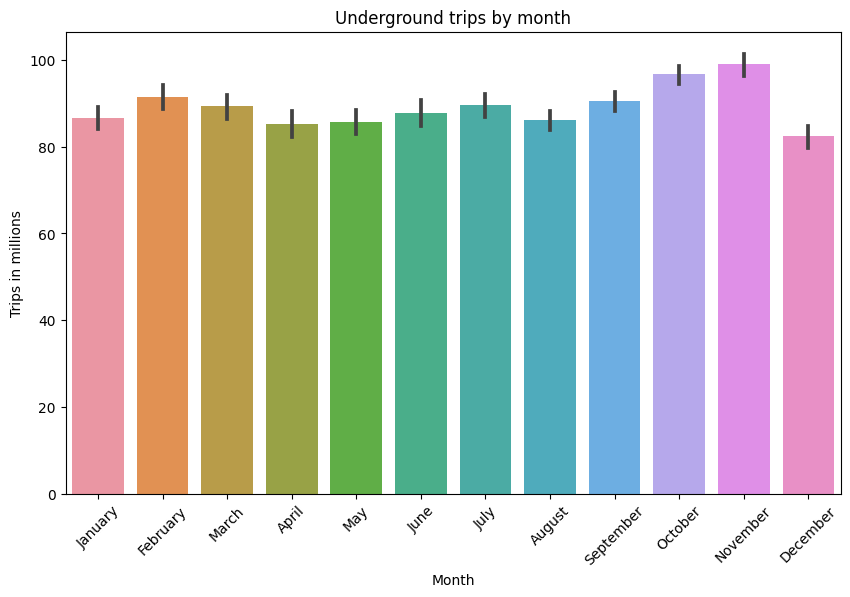

In [42]:
fig, ax = plt.subplots(figsize=(10,6))

bus_data = sns.barplot(data=df, x = "month_int", y = "underground_trips") 

plt.title("Underground trips by month")
bus_data.set_ylabel('Trips in millions')
bus_data.set_xlabel('Month')


plt.xticks(rotation=45)
ax.set_xticklabels(month_dic.values());


### Bus trips per year

Text(0.5, 0, 'Year')

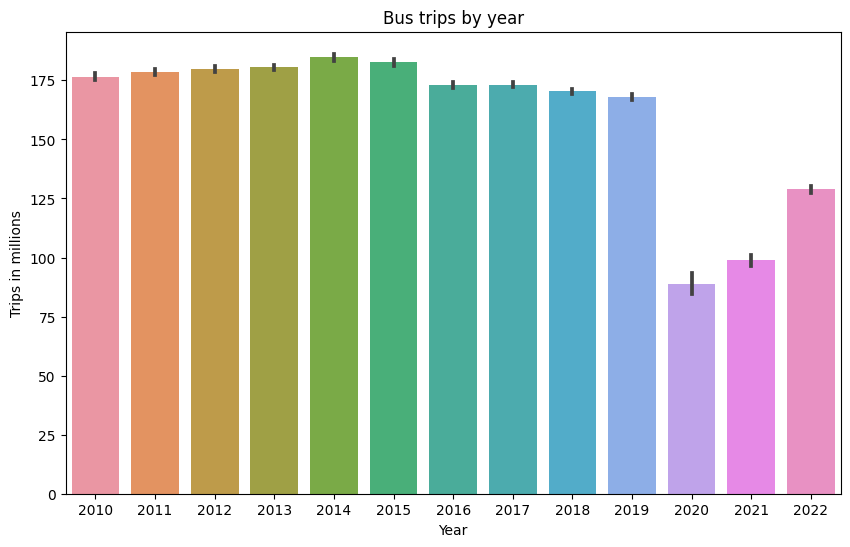

In [43]:
fig, ax = plt.subplots(figsize=(10,6))

bus_data = sns.barplot(data=df, x = "year", y = "bus_trips") #corregir alfabeticamente

plt.title("Bus trips by year")
bus_data.set_ylabel('Trips in millions')
bus_data.set_xlabel('Year')


#sns.barplot(data=df, x = "year", y = "bus_trips")

### Underground trips per year

Text(0.5, 0, 'Year')

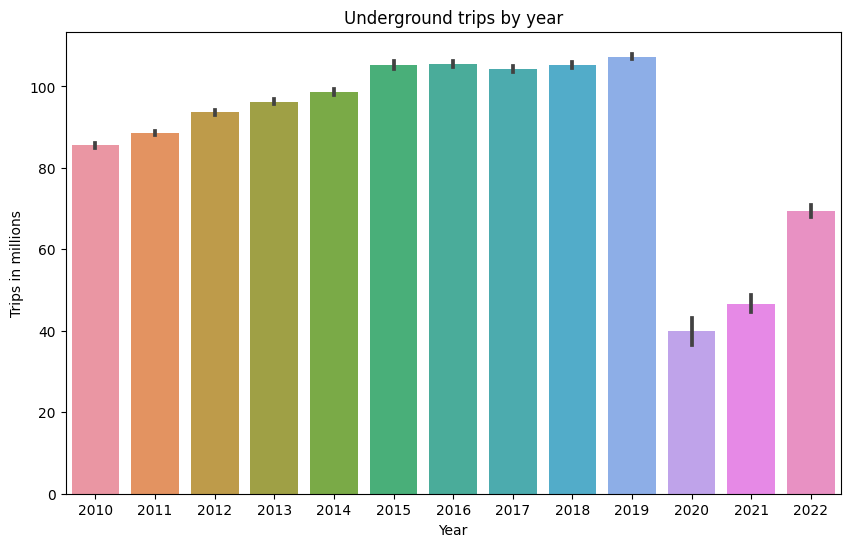

In [44]:
fig, ax = plt.subplots(figsize=(10,6))

bus_data = sns.barplot(data=df, x = "year", y = "underground_trips") 

plt.title("Underground trips by year")
bus_data.set_ylabel('Trips in millions')
bus_data.set_xlabel('Year')


#sns.barplot(data=df, x = "year", y = "bus_trips")

# Fuel consumption

## Preprocessing

In [93]:
fuel_consumption = pd.read_csv("fuel_consumption.csv")
    
fuel_consumption.head(5)

,Year,Buses,Diesel Cars,Petrol cars,Bikes,Freight
0,2005,"185,051","498,824","1,422,828","37,592","291,752"
1,2006,"195,654","537,094","1,370,264","38,171","290,133"
2,2007,"193,961","569,663","1,309,470","40,001","292,243"
3,2008,"188,813","609,015","1,223,050","34,416","294,090"
4,2009,"187,266","621,982","1,205,290","33,993","271,564"


In [94]:
for column in fuel_consumption.columns[1:]:
    fuel_consumption[column] = fuel_consumption[column].str.replace(",","").astype(int)


## Graphs

### Bus consumtion by year

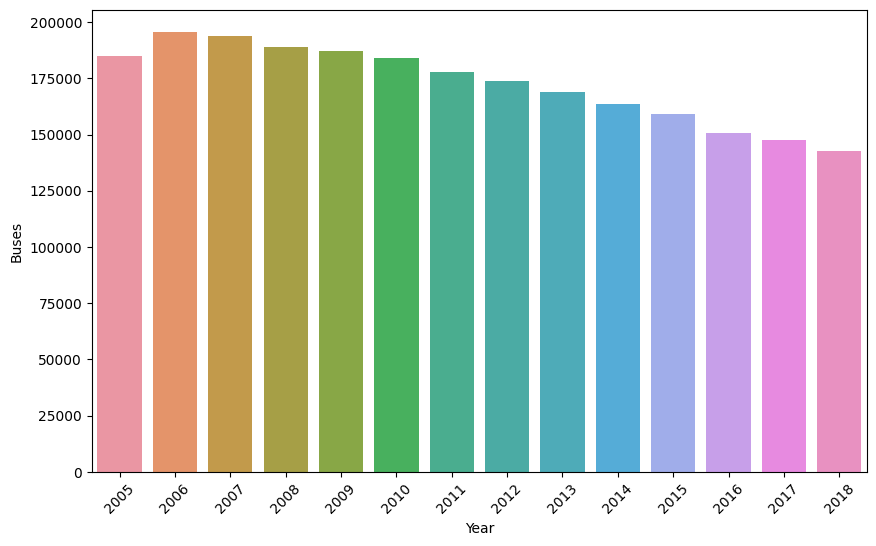

In [95]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=fuel_consumption, x = "Year", y = "Buses")
plt.xticks(rotation=45);

### Yearly consumption by diesel cars

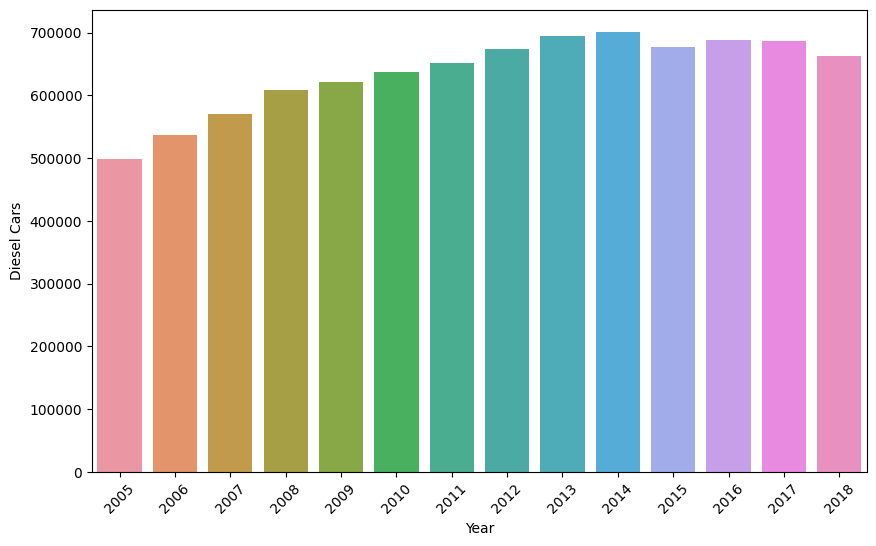

In [96]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=fuel_consumption, x = "Year", y = "Diesel Cars")
plt.xticks(rotation=45);

### Yearly consumption by petrol cars

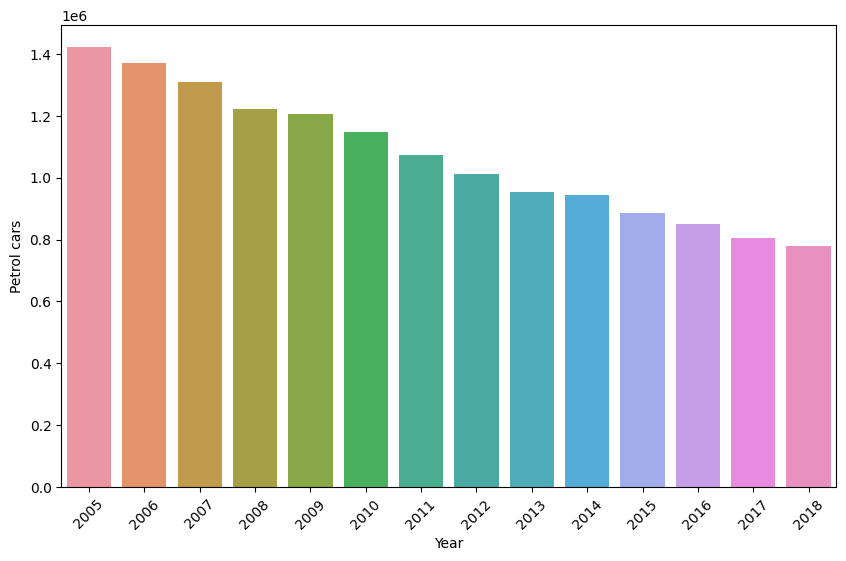

In [97]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=fuel_consumption, x = "Year", y = "Petrol cars")
plt.xticks(rotation=45);

### Total fuel Consumption 

In [98]:
fuel_consumption['total_sum'] = fuel_consumption.iloc[: , 1:].sum(axis=1).values

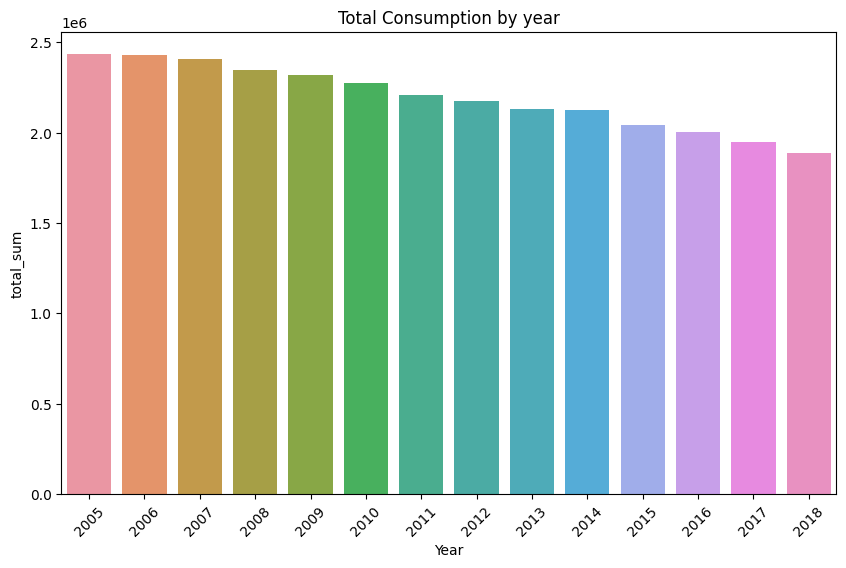

In [99]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data=fuel_consumption, x = "Year", y = "total_sum")
plt.title("Total Consumption by year")
bus_data.set_ylabel('Consumption')
bus_data.set_xlabel('Year')

plt.xticks(rotation=45);

### Consumption by type of transport

In [100]:
fuel_consumption = fuel_consumption.set_index("Year")
car_total = fuel_consumption[['Petrol cars', 'Diesel Cars']].sum(axis=1)
fuel_consumption['Cars'] = car_total
fuel_consumption = fuel_consumption.drop(['Petrol cars', 'Diesel Cars'], axis = 1)

In [101]:
fuel_consumption= fuel_consumption.drop(['total_sum'], axis = 1)

Text(0, 0.5, 'Oil in tonnes')

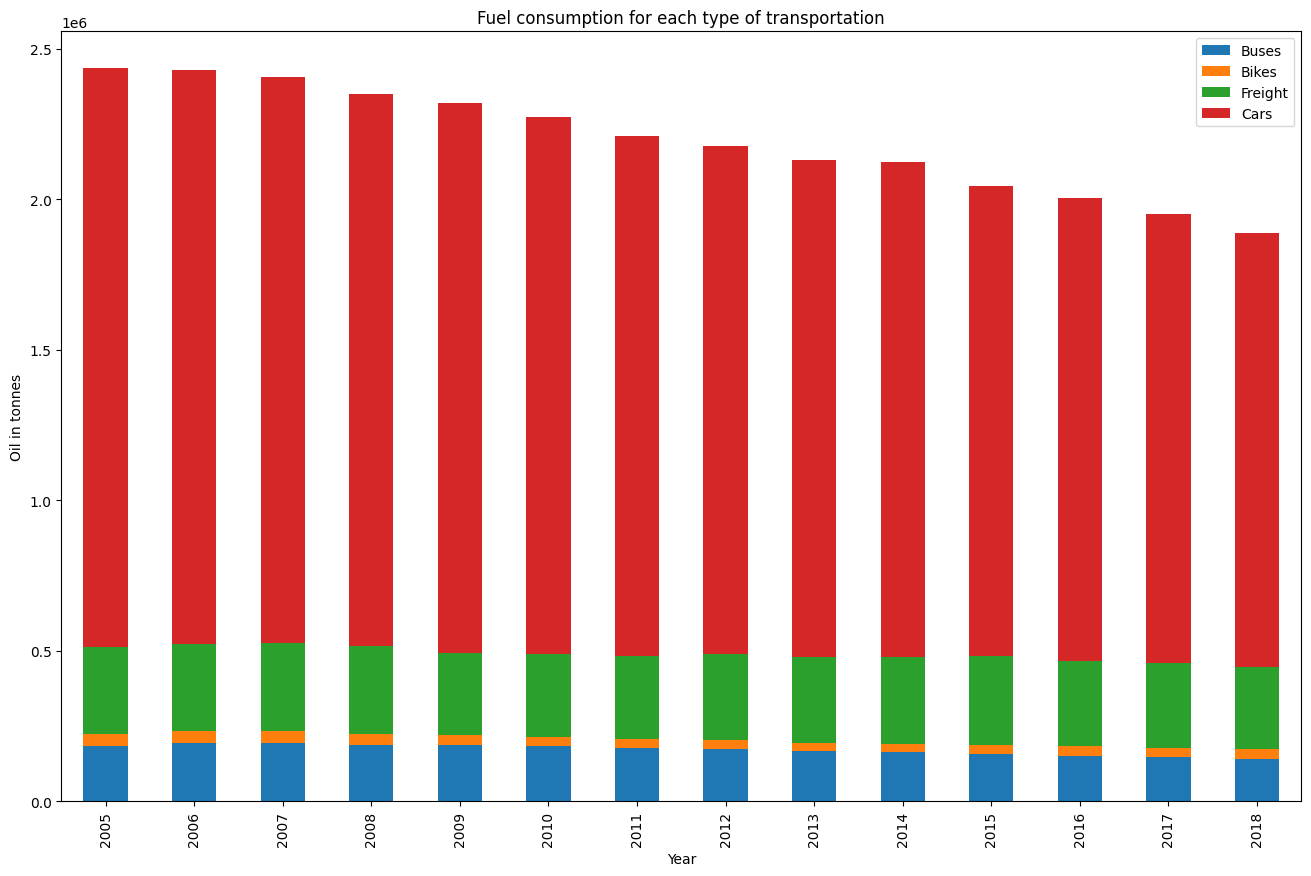

In [102]:
fuel_plot = fuel_consumption.plot(kind="bar", stacked=True, figsize = (16,10)) 
plt.title("Fuel consumption for each type of transportation")

fuel_plot.set_ylabel('Oil in tonnes')

In [121]:
fuel_cons = pd.read_csv("fuel_consumption.csv")

In [122]:
for column in fuel_cons.columns[1:]:
    fuel_cons[column] = fuel_cons[column].str.replace(",","").astype(int)
fuel_cons

,Year,Buses,Diesel Cars,Petrol cars,Bikes,Freight
0,2005,185051,498824,1422828,37592,291752
1,2006,195654,537094,1370264,38171,290133
2,2007,193961,569663,1309470,40001,292243
3,2008,188813,609015,1223050,34416,294090
4,2009,187266,621982,1205290,33993,271564
5,2010,184172,637026,1146775,31123,275001
6,2011,177943,652005,1074176,29643,276858
7,2012,173819,673726,1011677,28776,287975
8,2013,169010,694510,955017,26669,285478
9,2014,163437,701282,943064,27775,289161


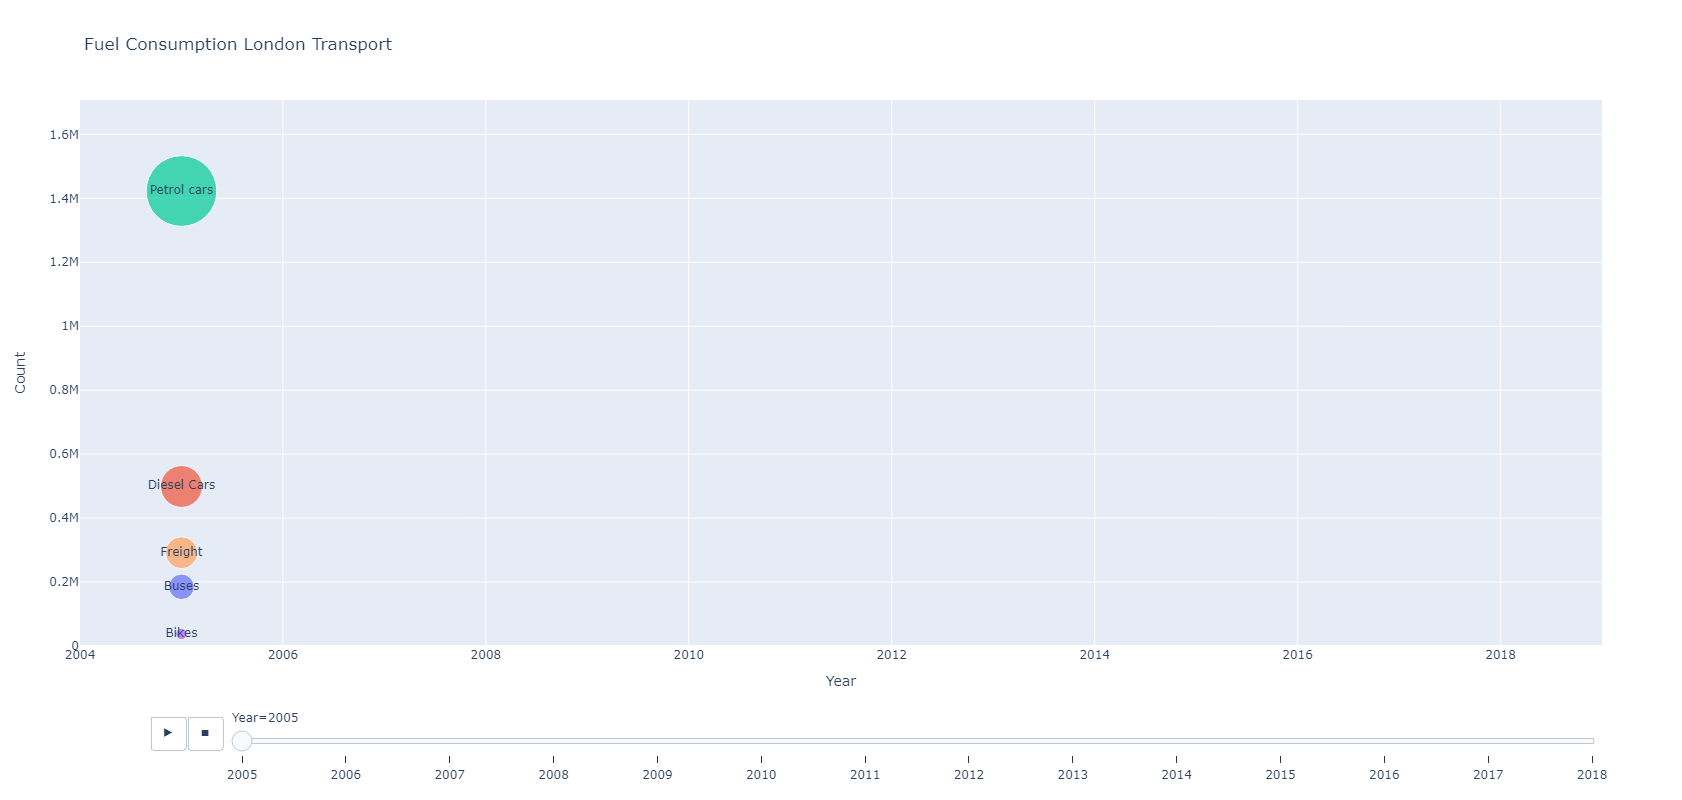

In [127]:
import plotly.express as px
import pandas as pd


data = fuel_cons

melted_data = data.melt('Year', var_name='Category', value_name='Count')

fig = px.scatter(
    melted_data,
    x='Year',
    y='Count',
    animation_frame='Year',
    animation_group='Category',
    color='Category',
    hover_name='Category',
    text='Category',  # Use the Category column as labels
    size='Count',
    title='Fuel Consumption London Transport',
    labels={'Year': 'Year', 'Count': 'Count'},
    range_y=[0, data.values.max() * 1.1],
    size_max=50
)


fig.update_layout(
    width=1200,
    height=800,
    xaxis=dict(range=[2004, 2019]),
    yaxis=dict(range=[0, data.values.max() * 1.2]),
    hovermode='closest',
    showlegend=False
)

# Show the figure
fig.show()


In [128]:
fig.write_html('plot.html')


### Relative consumption by type of transport

Text(0.5, 1.0, 'Relative change of fuel comsumption for each type of transport')

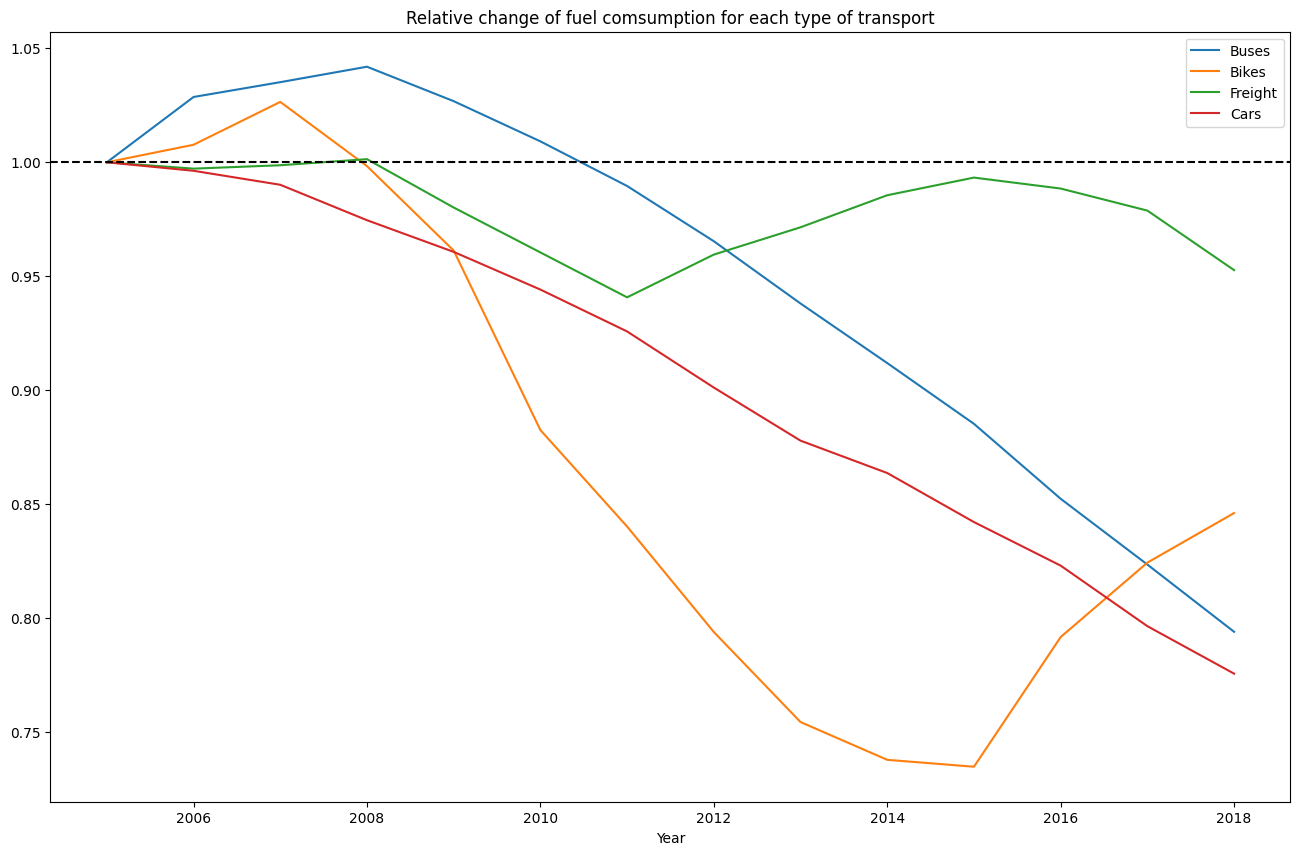

In [105]:
(fuel_consumption / fuel_consumption.iloc[0]).rolling(3, min_periods = 1).mean().plot(figsize = (16,10))
plt.axhline(y = 1, color = 'black', linestyle = '--')
plt.title("Relative change of fuel comsumption for each type of transport")

# Journeys by type of transport

## Preprocessing

In [106]:
transport = pd.read_csv("transport.csv") 
transport.head(5)

,Year,Rail,LU/DLR,Bus,Taxi,Car driver,Car passenger,Motorcycle,Cycle,Walk,All
0,2010,2.3,2.1,4.0,0.3,6.1,3.6,0.2,0.5,6.1,25.1
1,2011,2.4,2.2,4.1,0.3,5.9,3.6,0.2,0.5,6.2,25.3
2,2012,2.6,2.4,4.1,0.3,5.9,3.6,0.2,0.5,6.3,25.8
3,2013,2.7,2.5,4.1,0.3,5.8,3.6,0.2,0.5,6.3,26.1
4,2014,2.8,2.6,4.1,0.3,5.9,3.7,0.2,0.6,6.4,26.6


In [107]:
transport = transport.set_index("Year")

In [108]:
public_transport = ['Rail', 'LU/DLR', 'Bus', 'Taxi']
private_transport = ['Car driver', 'Car passenger','Motorcycle']

In [109]:
transport["Public Transport"] = transport[public_transport].sum(axis=1)
transport["Private Transport"] = transport[private_transport].sum(axis=1)

In [110]:
transport = transport.drop(public_transport+private_transport, axis = 1)
transport = transport.drop("All", axis = 1)

In [111]:
transport = transport[["Public Transport", "Private Transport", "Walk", "Cycle"]]
transport.head(5)

,Public Transport,Private Transport,Walk,Cycle
Year,,,,
2010,8.7,9.9,6.1,0.5
2011,9.0,9.7,6.2,0.5
2012,9.4,9.7,6.3,0.5
2013,9.6,9.6,6.3,0.5
2014,9.8,9.8,6.4,0.6


## Graphs

### Number of trips per type of transportation in millions

Text(0.5, 1.0, 'Number of trips per type of transportation in millions')

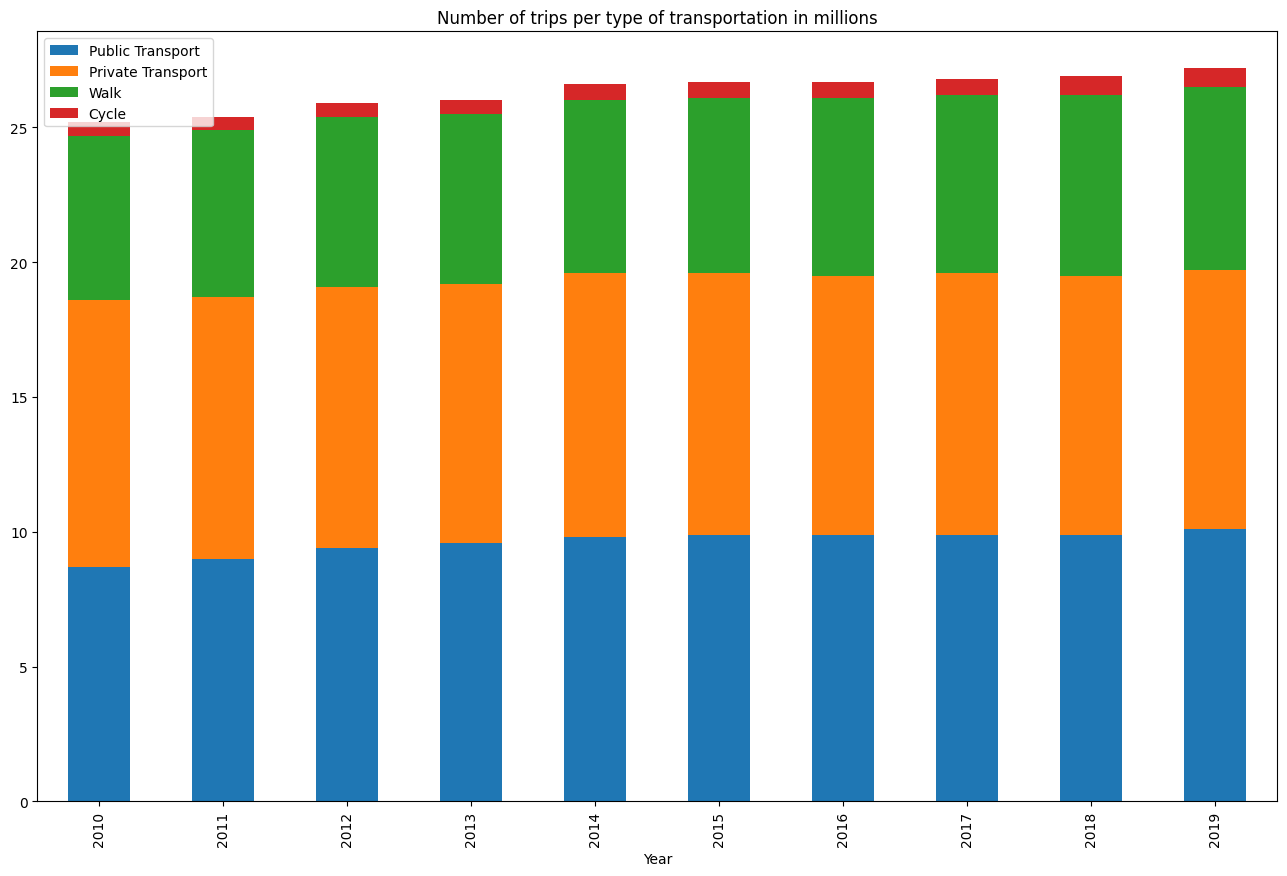

In [112]:
transport.plot(kind="bar", stacked=True, figsize = (16,10)) #CANTIDAD DE VIAJES COMO EN EL GRÁFICO DE LA PÁGINA 57
plt.title("Number of trips per type of transportation in millions")

### Change in number of trip per type of transportation

In [59]:
transport_original = pd.read_csv("transport.csv")
transport_original = transport_original.set_index("Year")
transport_original = transport_original.drop("All", axis = 1)

Text(0.5, 1.0, 'Change in number of trip per type of transportation. Millions')

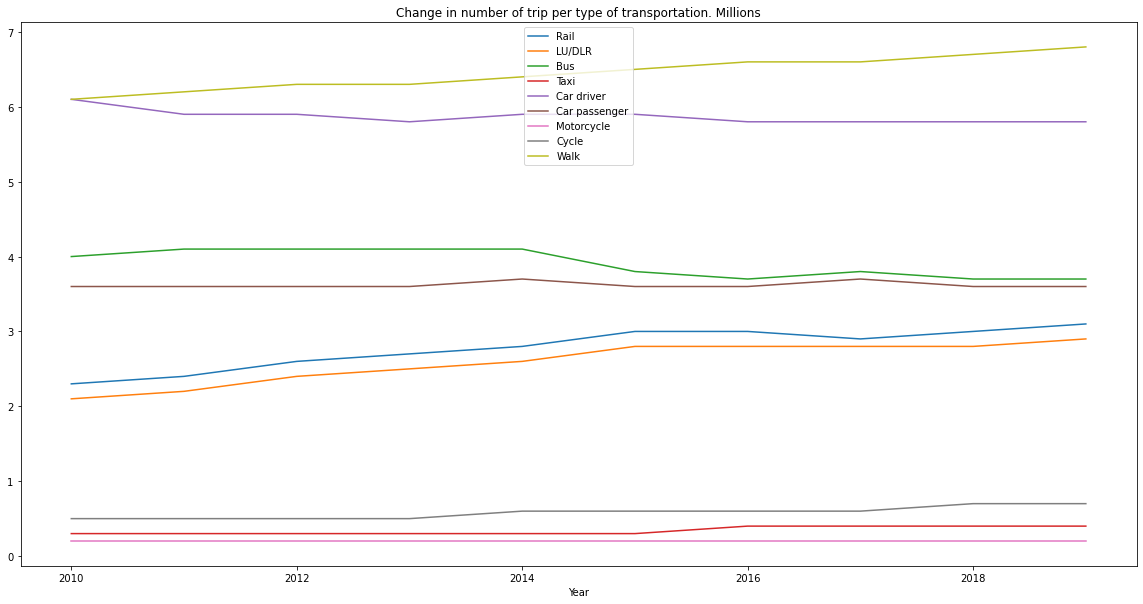

In [60]:
transport_original.plot(figsize=(20,10))
plt.title("Change in number of trip per type of transportation. Millions")

### Relative change of number of trips over time

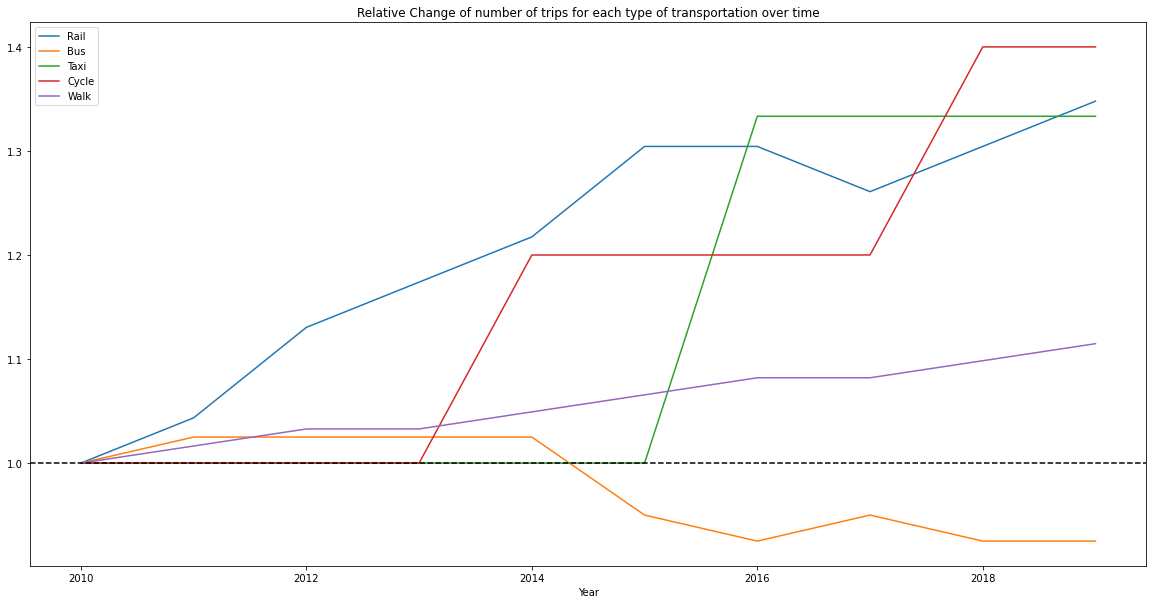

In [61]:
selected = ["Rail", "Bus", "Taxi", "Cycle", "Walk"]
(transport_original[selected] / transport_original[selected].iloc[0]).plot(figsize=(20,10))
plt.title("Relative Change of number of trips for each type of transportation over time")
plt.axhline(y = 1, color = 'black', linestyle = '--')

# Emissions 

## Pre-processing

In [62]:
def make_them_joined(df, columns, new_name):
    df[new_name] = df[columns].sum(axis=1)
    df = df.drop(columns, axis = 1)
    return df

In [63]:
# Slow code 

In [64]:
emissions_2010 = pd.read_excel("LAEI2016_MajorRoads_EmissionsbyLink_2010.xlsb")
emissions_2010  = emissions_2010[['Motorcycle', 'Taxi', 'Petrol Car','Diesel Car', 'Electric Car', 'Petrol LGV', 'Diesel LGV','Electric LGV', 'TfL Bus', 'Coach', 'Rigid HGV', 'Artic HGV']]
emissions_2010 = emissions_2010.sum()

emissions_2013 = pd.read_excel("LAEI2016_MajorRoads_EmissionsbyLink_2013.xlsb")
emissions_2013  = emissions_2013[['Motorcycle', 'Taxi', 'Petrol Car','Diesel Car', 'Electric Car', 'Petrol LGV', 'Diesel LGV','Electric LGV', 'TfL Bus', 'Coach', 'Rigid HGV', 'Artic HGV']]
emissions_2013 = emissions_2013.sum()

emissions_2016 = pd.read_excel("LAEI2016_MajorRoads_EmissionsbyLink_2016.xlsb")
emissions_2016  = emissions_2016[['Motorcycle', 'Taxi', 'Petrol Car','Diesel Car', 'Electric Car', 'Petrol LGV', 'Diesel LGV','Electric LGV', 'TfL Bus', 'Coach', 'Rigid HGV', 'Artic HGV']]
emissions_2016 = emissions_2016.sum()

In [65]:
total_emissions_df = pd.DataFrame([emissions_2010,emissions_2013,emissions_2016], index = [2010,2013,2016])

## Graphs

### Number of emissions per type of transportation per year

Text(0.5, 1.0, 'Number of emissions per type of transportation per year. Tonnes')

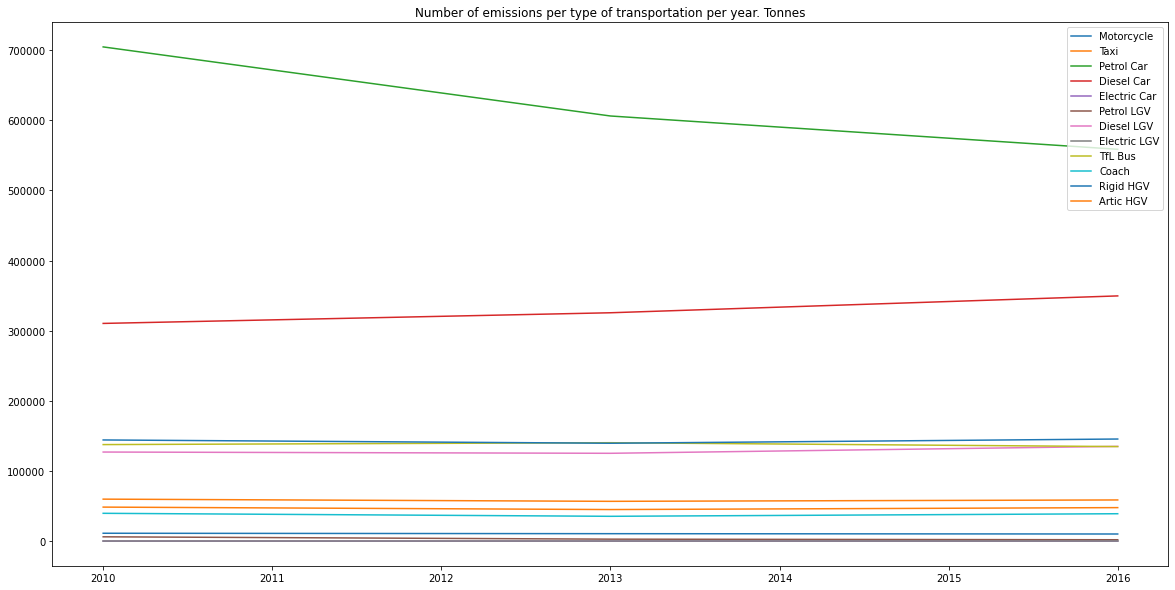

In [66]:
total_emissions_df.plot(figsize=(20,10))
plt.title("Number of emissions per type of transportation per year. Tonnes")

### Number of emissions per type of transportation per year

In [67]:
total_emissions_2 = make_them_joined(total_emissions_df, ["TfL Bus", "Coach"], "Buses")
total_emissions_2 = make_them_joined(total_emissions_2, ["Petrol Car", "Diesel Car"], "Private Cars")

In [68]:
total_emissions_2.head()

,Motorcycle,Taxi,Electric Car,Petrol LGV,Diesel LGV,Electric LGV,Rigid HGV,Artic HGV,Buses,Private Cars
2010,11172.256896,48464.735200,0.000000,6099.474457,126984.181830,0.000000,144223.883342,59824.266210,177232.294679,1.015109e+06
2013,10570.983451,44968.047162,0.141227,2754.268807,125195.380769,0.040960,139530.502844,56697.004707,175638.100428,9.317953e+05
2016,10108.440079,47728.832610,0.756052,1919.502378,135052.175756,0.137225,145547.932182,58651.861310,173799.454773,9.083304e+05


Text(0.5, 1.0, 'Number of emissions per type of transportation per year. Tonnes')

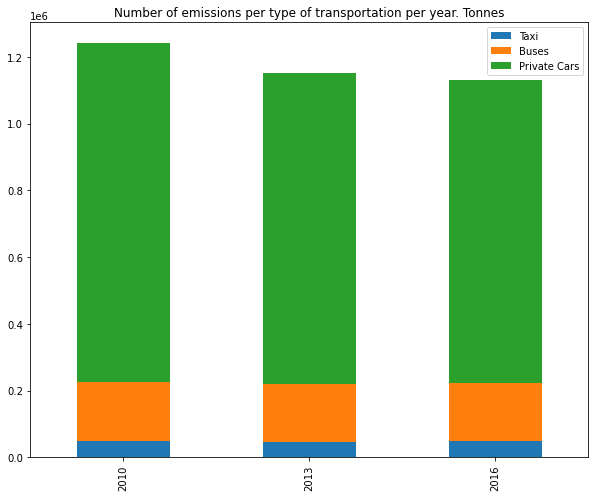

In [69]:
total_emissions_2[['Taxi', 'Buses', 'Private Cars']].plot(kind = "bar", stacked=True, figsize=(10,8))
plt.title("Number of emissions per type of transportation per year. Tonnes")

# Emissions per trip and passenger

## Pre-processing

In [70]:
transport_original_new = make_them_joined(transport_original.copy(), ["Car driver", "Car passenger"], "Private Cars")
transport_original_new = transport_original_new.rename({"Bus": "Buses"}, axis=1)

emissions_per_trips = total_emissions_df / transport_original_new

keep_cols = list(emissions_per_trips.notna().sum()[emissions_per_trips.notna().sum() > 0].index)

emissions_per_trips = emissions_per_trips[keep_cols].dropna()

## Graphs

### Emissions per trip and passenger

In [71]:
emissions_per_trips.head()

,Buses,Motorcycle,Taxi
2010,44308.073670,55861.284478,161549.117333
2013,42838.561080,52854.917255,149893.490539
2016,46972.825614,50542.200396,119322.081525


Text(0.5, 1.0, 'Emissions per trip per passenger')

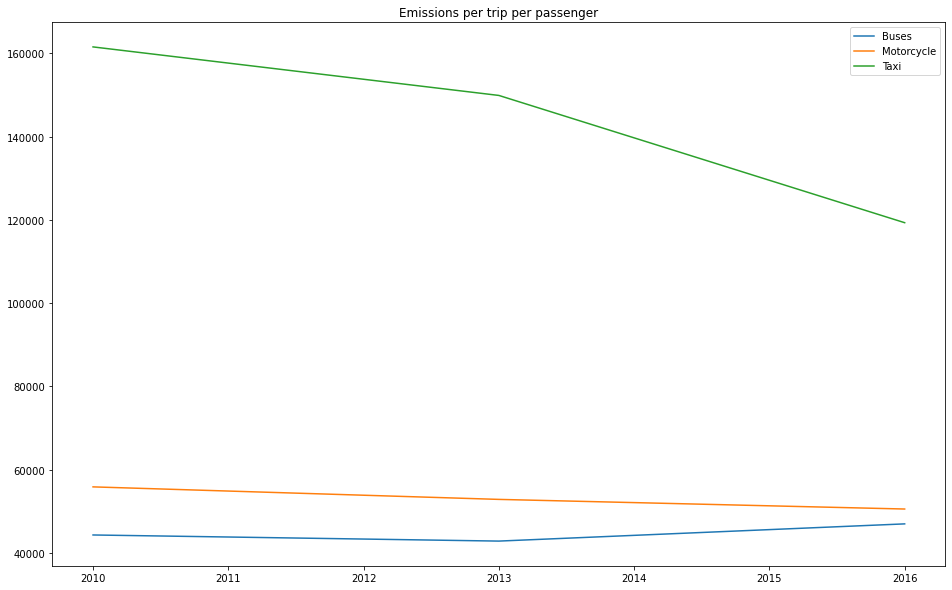

In [72]:
emissions_per_trips.plot(figsize=(16,10))
plt.title("Emissions per trip per passenger")